# Feedforward Neural Network Animation

✔ Activations propagate input → hidden → output

✔ Weights update every epoch

✔ Node colors = activation strength

✔ Edge thickness = weight magnitude

✔ Saves as GIF

✔ 100% Matplotlib-safe

## 🔥 Neural Network Architecture

Input layer: 2 neurons

Hidden layer: 4 neurons

Output layer: 1 neuron (sigmoid)

### Imports

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


### Create folder


In [2]:
os.makedirs("gifs", exist_ok=True)

### Activation functions

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_deriv(a):
    return a * (1 - a)

### Simple dataset

In [4]:

np.random.seed(0)
X = np.array([[0,0], [0,1], [1,0], [1,1]])
y = np.array([[0], [1], [1], [0]])  # XOR-like

### Network architecture

In [5]:
n_input = 2
n_hidden = 4
n_output = 1

W1 = np.random.randn(n_input, n_hidden)
b1 = np.zeros((1, n_hidden))
W2 = np.random.randn(n_hidden, n_output)
b2 = np.zeros((1, n_output))

lr = 0.8
epochs = 40

history = []


### Training loop

In [17]:
for _ in range(epochs):
    # Forward pass
    z1 = X @ W1 + b1
    a1 = sigmoid(z1)

    z2 = a1 @ W2 + b2
    a2 = sigmoid(z2)

    # Save activations + weights
    history.append((a1.mean(axis=0), a2.mean(), W1.copy(), W2.copy()))

    # Backprop
    error = a2 - y
    d2 = error * sigmoid_deriv(a2)

    d1 = d2 @ W2.T * sigmoid_deriv(a1)

    W2 -= lr * a1.T @ d2
    b2 -= lr * d2.mean(axis=0)

    W1 -= lr * X.T @ d1
    b1 -= lr * d1.mean(axis=0)

In [18]:
print(history)

[(array([0.79852529, 0.43293827, 0.70527754, 0.68899421]), np.float64(0.7631999138299944), array([[ 1.76405235,  0.40015721,  0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788,  0.95008842, -0.15135721]]), array([[-0.10321885],
       [ 0.4105985 ],
       [ 0.14404357],
       [ 1.45427351]])), (array([0.79858836, 0.43066329, 0.70502107, 0.68741265]), np.float64(0.7117147058443616), array([[ 1.76405848,  0.39271452,  0.97771425,  2.22924245],
       [ 1.86717924, -0.9823058 ,  0.95004726, -0.14626453]]), array([[-0.19503975],
       [ 0.34318142],
       [ 0.05206009],
       [ 1.35032069]])), (array([0.79867632, 0.4288154 , 0.70494614, 0.68634911]), np.float64(0.658343472325239), array([[ 1.76386094,  0.38648374,  0.97738725,  2.21798533],
       [ 1.86618815, -0.98644202,  0.9501165 , -0.13835583]]), array([[-0.27774942],
       [ 0.28112425],
       [-0.03308893],
       [ 1.25139354]])), (array([0.7987409 , 0.42748669, 0.7049753 , 0.68591749]), np.float64(0.61077555202740

### Visualization setup


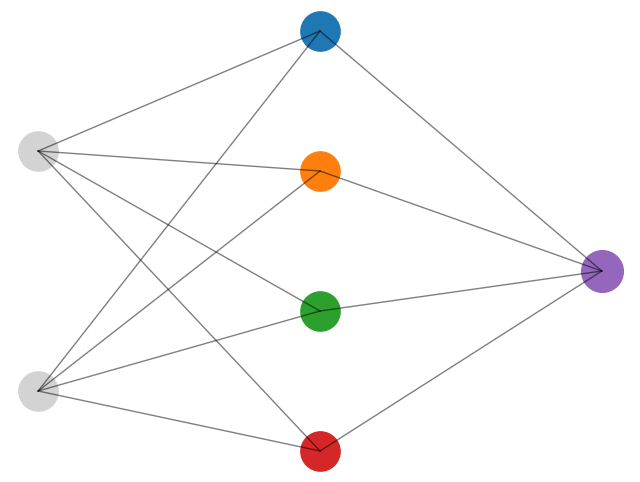

In [19]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis("off")

# Node positions
input_pos = [(0, 0.6), (0, 0.2)]
hidden_pos = [(0.5, y) for y in np.linspace(0.8, 0.1, n_hidden)]
output_pos = [(1, 0.4)]

# Draw static nodes
input_nodes = [ax.scatter(*p, s=800, c="lightgray") for p in input_pos]
hidden_nodes = [ax.scatter(*p, s=800) for p in hidden_pos]
output_node = ax.scatter(*output_pos[0], s=900)

# Draw edges
edges = []

def connect(src, dst):
    line, = ax.plot(
        [src[0], dst[0]], [src[1], dst[1]],
        lw=1, color="black", alpha=0.5
    )
    return line

for i in range(n_input):
    for j in range(n_hidden):
        edges.append(connect(input_pos[i], hidden_pos[j]))

for j in range(n_hidden):
    edges.append(connect(hidden_pos[j], output_pos[0]))

### Init function (CRITICAL)

In [8]:
def init():
    for node in hidden_nodes:
        node.set_color("lightgray")
    output_node.set_color("lightgray")

    for e in edges:
        e.set_linewidth(1)

    ax.set_title("Feedforward Neural Network — Epoch 0")
    return hidden_nodes + [output_node] + edges

### Animation update

In [20]:
def update(epoch):
    a1, a2, W1_h, W2_h = history[epoch]

    # Update node colors (activations)
    for i, node in enumerate(hidden_nodes):
        node.set_color(plt.cm.viridis(a1[i]))

    output_node.set_color(plt.cm.viridis(a2))

    # Update edge thickness (weights)
    idx = 0
    for i in range(n_input):
        for j in range(n_hidden):
            edges[idx].set_linewidth(abs(W1_h[i, j]) * 2 + 0.5)
            idx += 1

    for j in range(n_hidden):
        edges[idx].set_linewidth(abs(W2_h[j, 0]) * 2 + 0.5)
        idx += 1

    ax.set_title(f"Feedforward Neural Network — Epoch {epoch+1}")

    # ✅ MUST return artists
    return hidden_nodes + [output_node] + edges


# ----------------------------
# Create animation (IMPORTANT FLAGS)
# ----------------------------
ani = FuncAnimation(
    fig,
    update,
    frames=len(history),
    init_func=init,      # 🔥 REQUIRED
    interval=400,
    blit=False           # 🔥 safer for saving
)

# ----------------------------
# Save GIF BEFORE show()
# ----------------------------
# Force first frame render (THIS FIXES THE ERROR)
init()
update(0)
fig.canvas.draw()

ani.save("gifs/feedforward_nn.gif", writer="pillow")
plt.show()


plt.show()


c:\Users\NIL\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
